In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

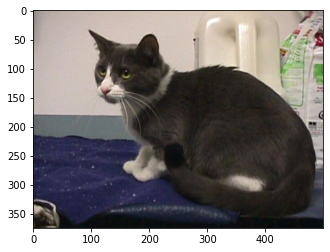

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

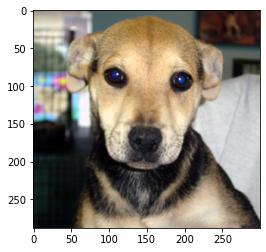

In [3]:
dog4 = cv2.imread('../DATA/CATS_DOGS/train/DOG/4.jpg')
dog4 = cv2.cvtColor(dog4, cv2.COLOR_BGR2RGB)
plt.imshow(dog4)

In [4]:
print(cat4.shape)
print(dog4.shape)
input_shape = (150, 150, 3)

(375, 500, 3)
(288, 300, 3)


In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
image_generator = ImageDataGenerator(rotation_range=30, 
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     rescale=1/255,
                                     shear_range=0.2, 
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [7]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Activation, Conv2D, Dropout, Dense

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1)) # Zero for cat or One for dog. Binary class
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
batch_size = 16
train_img_gen = image_generator.flow_from_directory('../DATA/CATS_DOGS/train',
                                                   target_size = input_shape[:2],
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [11]:
test_img_gen = image_generator.flow_from_directory('../DATA/CATS_DOGS/test',
                                                   target_size = input_shape[:2],
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [12]:
test_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [13]:
results = model.fit_generator(train_img_gen, epochs=1, steps_per_epoch=150, 
                           validation_data=test_img_gen, validation_steps=12)

C:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


150/150 [==============================] - 35s 231ms/step - loss: 0.0000e+00 - accuracy: 0.4864 - val_loss: 0.0000e+00 - val_accuracy: 0.5365


In [14]:
results.history['accuracy']

[0.49541667103767395]

In [15]:
from keras.models import load_model
from keras.preprocessing import image

In [16]:
new_model = load_model('cat_dog_100epochs.h5')
dog_img = image.load_img('../DATA/CATS_DOGS/test/DOG/10005.jpg', target_size=input_shape)
dog_img = image.img_to_array(dog_img)

In [17]:
dog_img.shape

(150, 150, 3)

In [18]:
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [19]:
dog_img = dog_img/dog_img.max()

In [22]:
new_model.predict_classes(dog_img) # Wrong predict

C:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [24]:
new_model.predict(dog_img) # Wrong predict

array([[0.99387735]], dtype=float32)